In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(256, 512, 3)


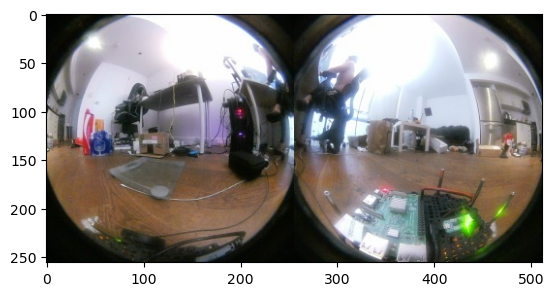

In [2]:
img = 'test.jpg'
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, c = img.shape
print(img.shape)
plt.imshow(img)

In [15]:
def spherical_project(XYZ):
    lat = np.arcsin(XYZ[..., 2])
    lon = np.arctan2(XYZ[..., 1], XYZ[..., 0])

    x = lon / np.pi
    y = lat / np.pi * 2

    xy = np.stack((x, y), axis=-1)
    return xy


def spherical_project_inverse(xy, r: float = 1.0):
    lon = np.pi * xy[..., 0]
    lat = np.pi * xy[..., 1] / 2

    XYZ = np.stack(
        (
            np.cos(lat) * np.cos(lon),
            np.cos(lat) * np.sin(lon),
            np.sin(lat),
        ),
        axis=-1,
    )
    return XYZ

In [16]:
from scipy.spatial.transform import Rotation as R

In [60]:
xmap = np.loadtxt('xmap.pgm').astype(np.float32)
ymap = np.loadtxt('ymap.pgm').astype(np.float32)

In [ ]:

def remap_thubnail(img):
    res = cv2.remap(img, xmap.astype(np.float32), ymap.astype(np.float32), cv2.INTER_AREA, borderMode=cv2.BORDER_REPLICATE)
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    x = x / w * 2 - 1
    y = y / h * 2 - 1
    xy = np.stack((x, y), axis=-1)
    xyz = spherical_project_inverse(xy)
    rot = R.from_euler('xyz', [0, 270, 0], degrees=True).as_matrix()
    xyz = xyz @ rot.T
    xy = spherical_project(xyz)
    x = xy[..., 0]
    y = xy[..., 1]
    xmap2 = (x + 1) / 2 * w
    ymap2 = (y + 1) / 2 * h
    res = cv2.remap(res, xmap2.astype(np.float32), ymap2.astype(np.float32), cv2.INTER_AREA, borderMode=cv2.BORDER_REPLICATE)

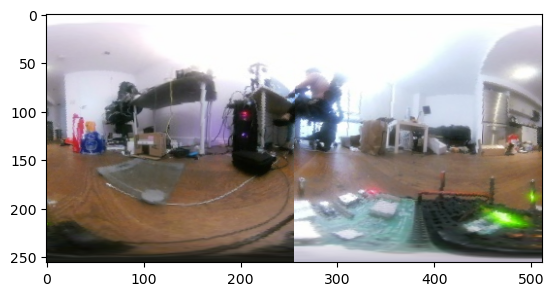

In [94]:
res = cv2.remap(img, xmap.astype(np.float32), ymap.astype(np.float32), cv2.INTER_AREA, borderMode=cv2.BORDER_REPLICATE)
x, y = np.meshgrid(np.arange(w), np.arange(h))
x = x / w * 2 - 1
y = y / h * 2 - 1
xy = np.stack((x, y), axis=-1)
xyz = spherical_project_inverse(xy)
rot = R.from_euler('xyz', [0, 270, 0], degrees=True).as_matrix()
xyz = xyz @ rot.T
xy = spherical_project(xyz)
x = xy[..., 0]
y = xy[..., 1]
xmap2 = (x + 1) / 2 * w
ymap2 = (y + 1) / 2 * h
res = cv2.remap(res, xmap2.astype(np.float32), ymap2.astype(np.float32), cv2.INTER_AREA, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(res)

In [29]:
def to_sphere(xy):
    x = xy[..., 0]
    y = xy[..., 1]
    theta = np.arctan2(y, x)
    phi = np.arctan2(np.sqrt(x**2 + y**2), 1)
    XYZ = np.stack([np.cos(phi)*np.cos(theta), np.cos(phi)*np.sin(theta), np.sin(phi)], axis=-1)
    return XYZ

def to_rect(XYZ):
    X = XYZ[..., 0]
    Y = XYZ[..., 1]
    Z = XYZ[..., 2]
    

array([1, 0])